> [RRT*](https://arxiv.org/abs/1105.1186) - it plans a trajectory by incrementally growing a search tree

In [1]:
%cd -q ..

In [3]:
from environment.static.dual_kuka_env import DualKukaEnv
from objects.static.voxel import VoxelObject
env = DualKukaEnv(objects=[VoxelObject(base_orientation=[0, 0, 0, 1], base_position=[0, 1, 1], half_extents=[0.2, 0.2, 0.2]),
                           VoxelObject(base_orientation=[0, 0, 0, 1], base_position=[0, -0.5, 0.7], half_extents=[0.3, 0.1, 0.4])])

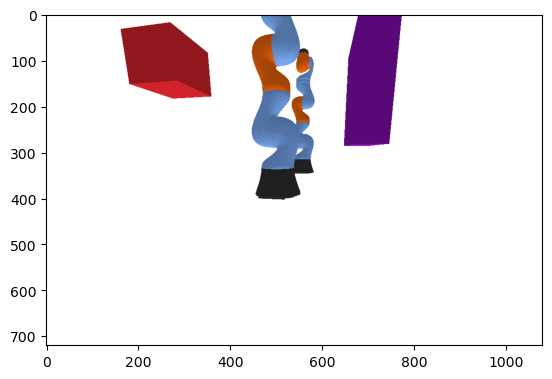

In [5]:
# visualize environment
%matplotlib inline
import matplotlib.pyplot as plt
env.load()
plt.imshow(env.render())
plt.show()

In [7]:
from planner.rrt_star_planner import RRTStarPlanner

In [8]:
# sample a non-trival problem setting and solve
while True:
    start, goal = env.robot.sample_random_init_goal()
    if not env.edge_fp(start, goal):
        result_initial = RRTStarPlanner(stop_when_success=True).plan(env, start, goal, timeout=('time', 10))
        result_refined = RRTStarPlanner(stop_when_success=False).plan(env, start, goal, timeout=('time', 10))
        if result_initial.solution and result_refined.solution:
            break

In [12]:
# Visualization
from time import sleep
def visualize_traj(env, trajectory):  
    gifs = []
    for timestep in np.linspace(0, len(trajectory.waypoints)-1, 100):
        env.robot.set_config(trajectory.get_spec(timestep))
        p.performCollisionDetection()
        sleep(0.1)
        gifs.append(p.getCameraImage(width=360, height=360, lightDirection=[1, 1, 1], shadow=1,
                                                 renderer=p.ER_BULLET_HARDWARE_OPENGL)[2]) 
    return gifs


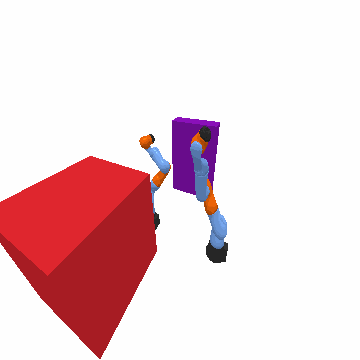


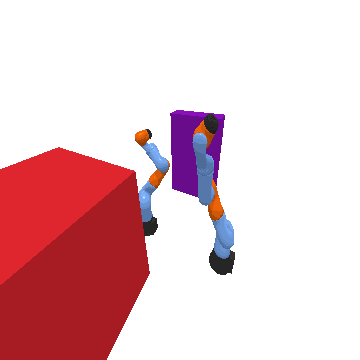

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import pybullet as p
import pybullet_data
import numpy as np
from utils.utils import save_gif
from IPython.display import HTML
import base64
from objects.trajectory import WaypointLinearTrajectory

env.load(GUI=True)
for title, result in [('rrt_star_initial', result_initial), ('rrt_star_refined', result_refined)]:
    # generate collision-free trajectory
    traj = WaypointLinearTrajectory(result.solution)    
    gifs = visualize_traj(env, traj)
    save_gif(gifs, f'data/visualization/{title}.gif')
    b64 = base64.b64encode(open(f'data/visualization/{title}.gif', 'rb').read()).decode('ascii')
    display(HTML(f'<img src="data:image/gif;base64,{b64}" />'))    

In [14]:
p.disconnect()